# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [362]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

import warnings
warnings.filterwarnings('ignore')

In [363]:
# Read the Mapbox API key
load_dotenv("mapbox.env")
map_box_api = os.getenv("mapbox")


## Load Data

In [364]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [521]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_house_units_year = sfo_data.groupby('year').mean()
mean_house_units_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [522]:
# Save the dataframe as a csv file
mean_house_units_year.to_csv("../Starter_Code/Data/fco_mean_house_year.csv")
file_path = Path("../Starter_Code/Data/fco_mean_house_year.csv")
sfo_mean = pd.read_csv(file_path, index_col="year")
sfo_mean

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='Years', ylabel='Housing Units'>

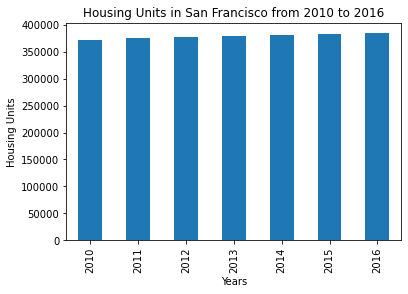

In [528]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

sfo_mean.plot(y="housing_units",title="Housing Units in San Francisco from 2010 to 2016", ylabel="Housing Units", xlabel="Years",kind='bar', legend=False)

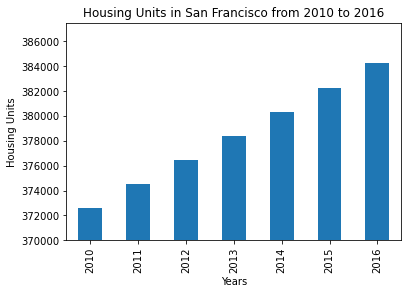

In [527]:
sfo_mean.plot(y="housing_units",title="Housing Units in San Francisco from 2010 to 2016", ylabel="Housing Units", xlabel="Years",kind='bar', legend=False)
plt.ylim(ymin=370000, ymax=387500) 
plt.show()

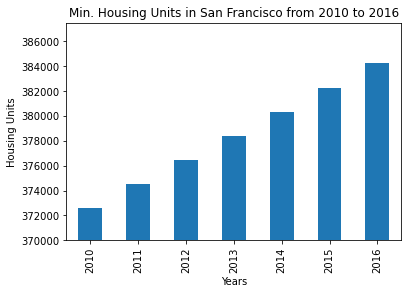

In [368]:
# Use the min to scale the y limits of the chart
min_house_units = sfo_data.groupby('year').min()
min_house_units.plot(y="housing_units",title="Min. Housing Units in San Francisco from 2010 to 2016", ylabel="Housing Units", xlabel="Years",kind='bar', legend=False)
plt.ylim(ymin=370000, ymax=387500)  
plt.show()


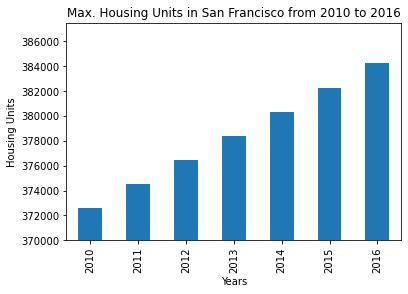

In [369]:
# Use the max to scale the y limits of the chart
max_house_units = sfo_data.groupby('year').max()
max_house_units.plot(y="housing_units",title="Max. Housing Units in San Francisco from 2010 to 2016", ylabel="Housing Units", xlabel="Years",kind='bar', legend=False)
plt.ylim(ymin=370000, ymax=387500)  
plt.show()

<AxesSubplot:title={'center':'STD Housing Units in San Francisco from 2010 to 2016'}>

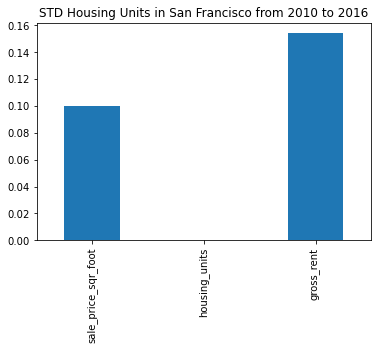

In [370]:
# Use the std to scale the y limits of the chart
sfo_returns = sfo_mean.pct_change()
sfo_returns.dropna(inplace=True)
sfo_returns.std().plot(title="STD Housing Units in San Francisco from 2010 to 2016", kind='bar', legend=False)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [371]:
# Calculate the average sale price per square foot and average gross rent
fco_avg_sale_rent = mean_house_units_year.drop(columns=['housing_units'])
fco_avg_sale_rent

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [372]:
#mean_house_units_year
fco_avg_units = mean_house_units_year.drop(columns=['sale_price_sqr_foot','gross_rent'])
fco_avg_units

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


<AxesSubplot:title={'center':'Average per SqFt by Year'}, xlabel='Years', ylabel='Price per SqFt'>

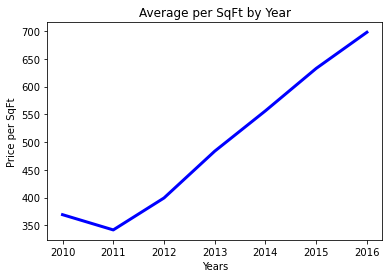

In [373]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

fco_avg_sale_rent.plot(y="sale_price_sqr_foot",title="Average per SqFt by Year", ylabel="Price per SqFt", linewidth=3, color='blue', xlabel="Years", kind='line', legend=False)

<AxesSubplot:title={'center':'Average Gross Rent by Year'}, xlabel='Years', ylabel='Price per SqFt'>

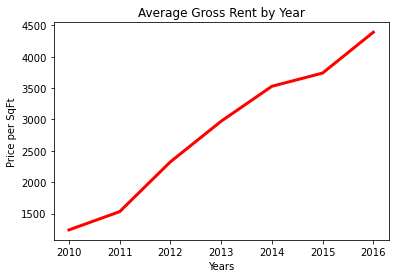

In [374]:
# Line chart for average montly rent
fco_avg_sale_rent.plot(y="gross_rent",title="Average Gross Rent by Year", ylabel="Price per SqFt", linewidth=3, color='red', xlabel="Years",kind='line', legend=False)
#plt.ylim(ymin=370000, ymax=387500)  
#plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [375]:
# Group by year and neighborhood and then create a new dataframe of the mean values
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path,)
sfo_data.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [376]:
sfo_mean=sfo_data.groupby('neighborhood').mean()
sfo_mean.reset_index(drop=False,inplace=True)
#sfo_mean.groupby('year').mean()
sfo_mean.head()

,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,2015.000000,590.792839,382295.0,3739.000000
4,Bernal Heights,2013.500000,576.746488,379374.5,3080.333333


In [377]:
#Eliminate neighborhood duplicates by grouping using Group By 

sfo_data.groupby('neighborhood')
fco_neighborhood = sfo_data['neighborhood']
fco_list_nei=[]
for i in fco_neighborhood: 
    fco_list_nei.append(i)

# The new list is 'fco_list_nei'

In [378]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def choose_neighborhood(neighborhood):    
    
    return neighborhood

fco_avg_sale_rent.hvplot.line(y='sale_price_sqr_foot', x='year')   

# Render plot with Panel interactive widget

interact(choose_neighborhood, neighborhood=fco_list_nei)



Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Markdown(str, name='interactive13935')

In [399]:
neigh_price_per_sq_ft=sfo_data.hvplot.line(x='year', y='sale_price_sqr_foot', groupby='neighborhood') 
neigh_price_per_sq_ft

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [529]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neigh_mon_rent=sfo_data.hvplot.line(x='year', y='gross_rent', groupby='neighborhood',title="Average Gross Rent in San Francisco Per Year") 
neigh_mon_rent

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [401]:
mean_neighbor = sfo_data.groupby('neighborhood').mean()


## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [462]:
mean_neighbor = mean_neighbor.sort_values(by='sale_price_sqr_foot', ascending=False)
top_10_expens = mean_neighbor.head(10)
top_10_expens.astype(int)

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Union Square District,2012,903,377427,2555
Merced Heights,2014,788,380348,3414
Miraloma Park,2011,779,375967,2155
Pacific Heights,2013,689,378401,2817
Westwood Park,2015,687,382295,3959
Telegraph Hill,2013,676,378401,2817
Presidio Heights,2013,675,378401,2817
Cow Hollow,2013,665,378401,2817
Potrero Hill,2013,662,378401,2817


In [463]:
top_10_expens.reset_index(inplace=True)

In [464]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_expens.hvplot.bar(x='neighborhood',y='sale_price_sqr_foot', rot=45, title='San Francisco Top 10 Most Expensive Neighborhoods') 

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [510]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
comparison = top_10_expens.groupby(['year','housing_units','neighborhood']).mean()
comparison.head().astype(int)


sale_price_sqr_foot  \
year        housing_units neighborhood                                 
2011.666667 375805.00     South Beach                            650   
2011.750000 375967.25     Miraloma Park                          779   
2012.500000 377427.50     Union Square District                  903   
2013.000000 378401.00     Cow Hollow                             665   
                          Pacific Heights                        689   

                                                 gross_rent  
year        housing_units neighborhood                       
2011.666667 375805.00     South Beach                  2099  
2011.750000 375967.25     Miraloma Park                2155  
2012.500000 377427.50     Union Square District        2555  
2013.000000 378401.00     Cow Hollow                   2817  
                          Pacific Heights              2817

In [477]:

comparison.hvplot.bar(stacked=False, height=500, rot=60,
                     title='San Francisco Comparison Avg Price/SF vs Avg Montly Rent/Years',
                    )

:Bars   [year,Variable]   (value)

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [499]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neigh_location = pd.read_csv(file_path,).drop_duplicates()
neigh_location.head(5)

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [500]:
# Calculate the mean values for each neighborhood
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
mean_sfo_neigh = pd.read_csv(file_path,).drop_duplicates()
mean_sfo_neigh = mean_sfo_neigh.groupby('neighborhood').mean()

# Reset neighborhood from Index
mean_sfo_neigh.reset_index(inplace=True)
mean_sfo_neigh=mean_sfo_neigh.drop(columns=['year'])
mean_sfo_neigh.head(5)


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [501]:
neigh_location_index = neigh_location.set_index("Neighborhood")
mean_sfo_neigh_index = mean_sfo_neigh.set_index("neighborhood")
avg_values_neighborhood = (
    pd.concat([neigh_location_index, mean_sfo_neigh_index], axis=1, sort=True)
    .dropna()
    .reset_index()
)
avg_values_neighborhood.head()

,index,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

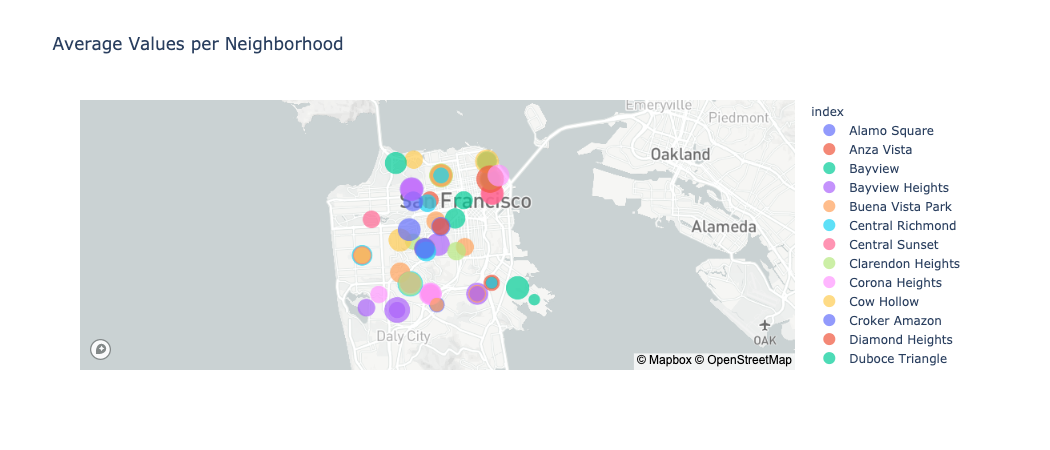

In [508]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info

neighborhood_plot = px.scatter_mapbox(
    avg_values_neighborhood,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="index",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Average Values per Neighborhood",
    zoom=10,
    width=1000,
)
 
#Display the map
neighborhood_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [531]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(top_10_expens["neighborhood"])]
ten_most_exp = df_expensive_neighborhoods_per_year.head(10)
ten_most_exp

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239
49,2010,South Beach,1037.099789,372560,1239
52,2010,Telegraph Hill,524.793509,372560,1239
54,2010,Union Square District,569.193448,372560,1239
67,2011,Cow Hollow,390.595653,374507,1530
89,2011,Miraloma Park,414.676065,374507,1530


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


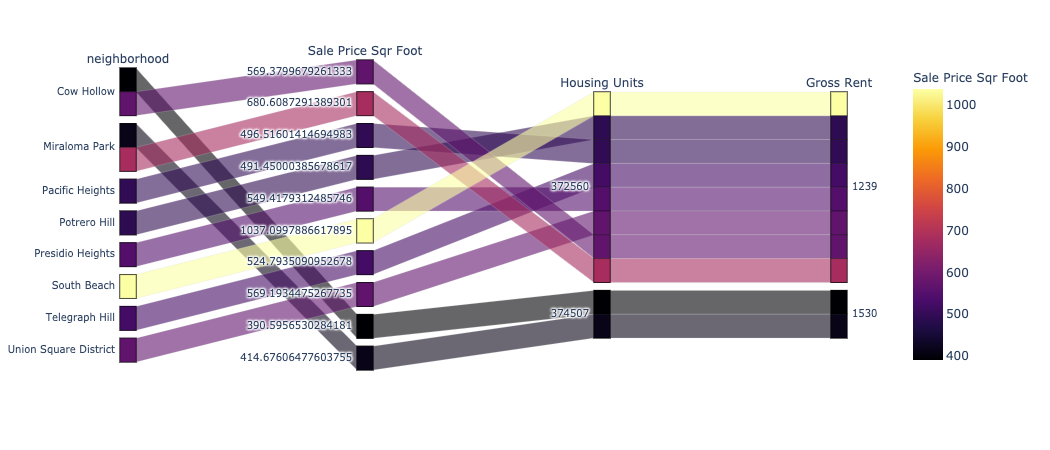

In [532]:
# Parallel Categories Plot

px.parallel_categories(
    ten_most_exp,
    dimensions=["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "sale_price_sqr_foot": "Sale Price Sqr Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)

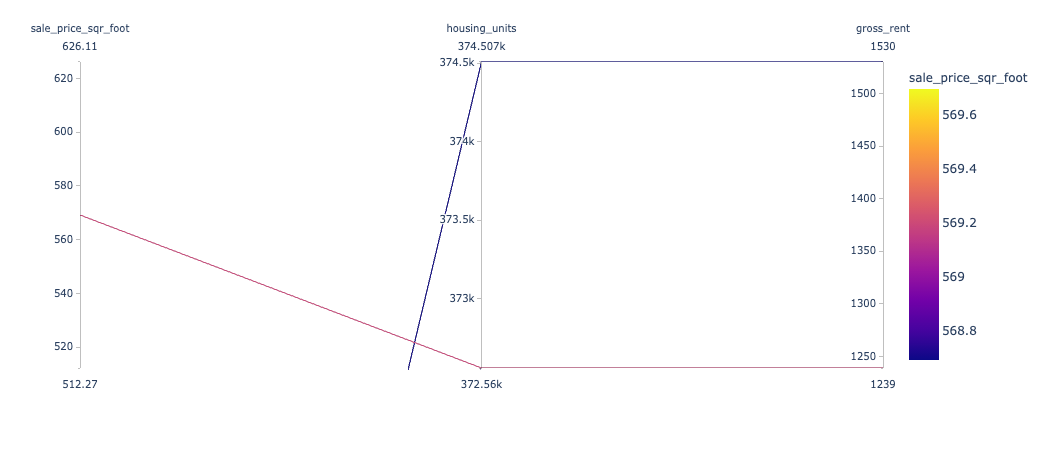

In [533]:
# Parallel Coordinates Plot
ten_most_exp=ten_most_exp.drop(columns=['year'])
px.parallel_coordinates(
    ten_most_exp, 
    color='sale_price_sqr_foot'
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

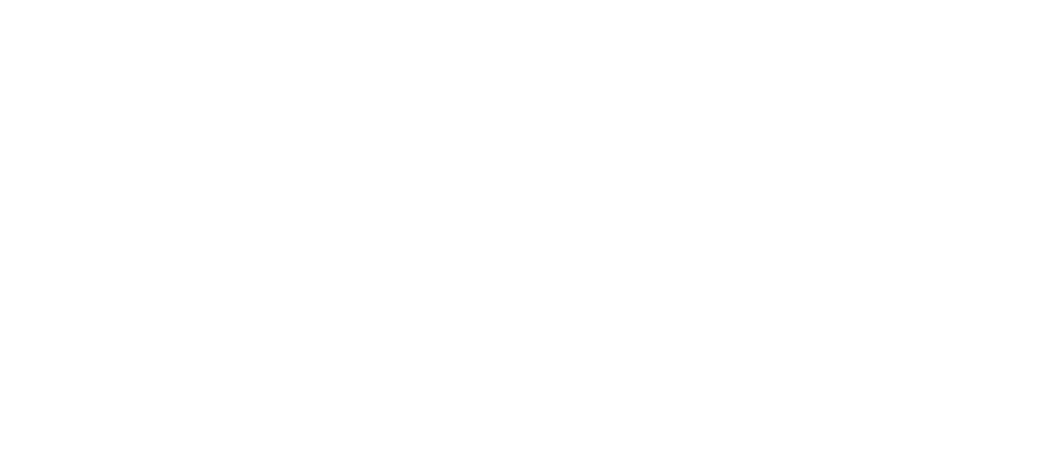

In [518]:
# Sunburst Plot
fig = px.sunburst(
     comparison,
     names="sale_price_sqr_foot",
     parents="gross_rent",
     values="sale_price_sqr_foot",
)
fig.show()